<a href="https://colab.research.google.com/github/liuxx479/kappaTNG/blob/master/Clkk_fitting_formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from pylab import *
import os
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
root = '/content/drive/My Drive/kappaTNG/'
ratio_path= os.path.join(root,'Clkk_ratio/')

In [4]:
zs = np.genfromtxt(ratio_path+'zs.dat')
zs

array([0.034467, 0.069515, 0.105182, 0.14151 , 0.178545, 0.216332,
       0.254921, 0.294363, 0.334713, 0.376027, 0.418368, 0.461799,
       0.506387, 0.552205, 0.599329, 0.647838, 0.697818, 0.749361,
       0.802561, 0.857522, 0.914352, 0.973168, 1.034093, 1.09726 ,
       1.162811, 1.230896, 1.301678, 1.37533 , 1.45204 , 1.532007,
       1.615449, 1.702597, 1.793703, 1.889038, 1.988896, 2.093596,
       2.203481, 2.318928, 2.440344, 2.568175])

In [5]:
ratios = np.array([np.genfromtxt(ratio_path+'ratio%02d.dat'%(i)) for i in range(1,41)])
ratios.shape ## the three columns are ell, ratio, std_ratio

(40, 30, 3)

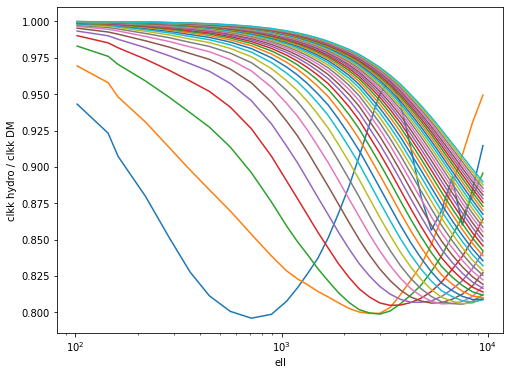

In [6]:
f, ax = subplots(1,1,figsize=(8,6))
for i in range(40):
    ax.plot(ratios[i,:,0],ratios[i,:,1])
ax.set_xlabel('ell')
ax.set_ylabel('clkk hydro / clkk DM')
ax.set_xscale('log')

In [7]:
############# fitting formula from Ken
zs2,  ls1,  ls2,  a1,  a2 = np.genfromtxt(root+'fitted_params_osato.txt', usecols=range(1,6)).T

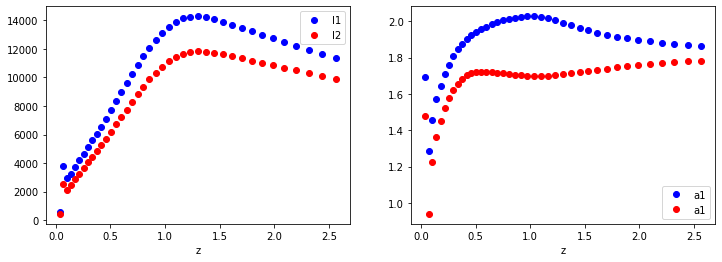

In [8]:
f, axes=subplots(1,2,figsize=(12,4))

axes[0].plot(zs, ls1,'bo',label='l1')
axes[0].plot(zs, ls2,'ro',label='l2')
axes[1].plot(zs, a1,'bo',label='a1')
axes[1].plot(zs, a2,'ro',label='a1')

axes[0].set_xlabel('z')
axes[1].set_xlabel('z')
axes[0].legend()
axes[1].legend()

In [9]:
## next, try to find a fitting formula with AI-Feynman https://github.com/SJ001/AI-Feynman
## https://github.com/dcshapiro/AI-Feynman/blob/master/AI_Feynman_2_0.ipynb
## or https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
## https://umap-learn.readthedocs.io/en/latest/
## or https://gplearn.readthedocs.io/en/stable/

In [10]:
!pip install --quiet git+https://github.com/SJ001/AI-Feynman.git

     |████████████████████████████████| 5.8MB 2.5MB/s 


In [12]:
from feynman import run_aifeynman
run_aifeynman(root+"AI-Feynman/example_data/", "example1.txt", 30,
              "14ops.txt", polyfit_deg=3, NN_epochs=500)

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/kappaTNG/AI-Feynman/example_data/example1.txt_train
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/kappaTNG/AI-Feynman/example_data/example1.txt_train
Checking polyfit 

Complexity  RMSE  Expression
[0.0, 30.834454019627426, '0']
[36.83243537730492, 29.12634010089305, cos(x0) + cos(x2 + x3) + 2.333740234375]
[55.42220420859321, 29.09077077952537, cos(x2 + x3) + 1.88584470748901]
[63.97127597744305, 28.64981495845409, '1.808310192134*(cos(((x3-x2)/pi)))**(-1)']
[73.2730466728654, 26.754024113174232, '0.2*x0**2 - 0.444444444444444*x0*x1 + 0.111111111111111*x0 + 0.2*x1**2 + 0.125*x1 + 0.2*x2**2 - 0.444444444444444*x2*x3 + 0.166666666666667*x2 + 0.2*x3**2 + 0.166666666666667*x3 + 0.2']
Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_atan/example1

In [ ]:
ratios